In [65]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# One sample t-test
from scipy.stats import ttest_1samp
# Two sample t-test
from scipy.stats import ttest_ind
# ANOVA
from scipy.stats import f_oneway
# Tukey's range test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Chi-squared test
from scipy.stats import chi2_contingency
# Binomial test
from scipy.stats import binomtest

# Import data
dogs = pd.read_csv('dog_data.csv')

# Subset to just whippets, terriers, and pitbulls
dogs_wtp = dogs[dogs.breed.isin(['whippet', 'terrier', 'pitbull'])]

# Subset to just poodles and shihtzus
dogs_ps = dogs[dogs.breed.isin(['poodle', 'shihtzu'])]

# Inspect the first few rows of the data
display(dogs.head())
display(dogs.info())
display(dogs.describe(include='all'))

,is_rescue,weight,tail_length,age,color,likes_children,is_hypoallergenic,name,breed
0,0,6,2.25,2,black,1,0,Huey,chihuahua
1,0,4,5.36,4,black,0,0,Cherish,chihuahua
2,0,7,3.63,3,black,0,1,Becka,chihuahua
3,0,5,0.19,2,black,0,0,Addie,chihuahua
4,0,5,0.37,1,black,1,1,Beverlee,chihuahua


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   is_rescue          800 non-null    int64  
 1   weight             800 non-null    int64  
 2   tail_length        800 non-null    float64
 3   age                800 non-null    int64  
 4   color              800 non-null    object 
 5   likes_children     800 non-null    int64  
 6   is_hypoallergenic  800 non-null    int64  
 7   name               800 non-null    object 
 8   breed              800 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 56.4+ KB


None

,is_rescue,weight,tail_length,age,color,likes_children,is_hypoallergenic,name,breed
count,800.000000,800.000000,800.000000,800.000000,800,800.000000,800.000000,800,800
unique,NaN,NaN,NaN,NaN,5,NaN,NaN,767,8
top,NaN,NaN,NaN,NaN,grey,NaN,NaN,Bethany,chihuahua
freq,NaN,NaN,NaN,NaN,370,NaN,NaN,3,100
mean,0.091250,40.340000,7.658625,4.097500,NaN,0.410000,0.376250,NaN,NaN
std,0.288144,23.739289,5.878545,2.585798,NaN,0.492141,0.484747,NaN,NaN
min,0.000000,1.000000,0.190000,1.000000,NaN,0.000000,0.000000,NaN,NaN
25%,0.000000,16.000000,2.957500,2.000000,NaN,0.000000,0.000000,NaN,NaN
50%,0.000000,44.000000,5.940000,4.000000,NaN,0.000000,0.000000,NaN,NaN
75%,0.000000,59.000000,10.810000,5.000000,NaN,1.000000,1.000000,NaN,NaN


In [66]:
#extract the is_rescue column from the dataset
whippet_rescue = dogs.is_rescue[dogs.breed == 'whippet']
#count the number of rescued dogs in the dataset
num_whippet_rescue = sum(whippet_rescue == 1)
num_whipets = len(whippet_rescue)
#calculate the percentage of rescued dogs
percentage_rescued = (num_whippet_rescue/num_whipets)*100
print(f'The percentage of rescued pets is {percentage_rescued}%')
print(f'The number of whippets in the dataset is {num_whipets}')

The percentage of rescued pets is 6.0%
The number of whippets in the dataset is 100


### Binomal Test
- **Null**: 8% of whippets are rescues
- **Alternative:** More or less than 8% of whippets are rescues

In [67]:
# Test the hypothesis that whippets are 8% rescues
# num_whippet_rescue is the number of whippets that are rescued or the number of "successes"
# num_whipets is the total number of whippets or the number of "trials"
# 0.08 is the hypothesized probability of success
result = binomtest(num_whippet_rescue, num_whipets, 0.08, alternative='two-sided')
print(result)
print(f'The result of the pvalue is {result.pvalue}')
print('The result is not significant' if result.pvalue > 0.05 else 'The results is significant')


BinomTestResult(k=6, n=100, alternative='two-sided', statistic=0.06, pvalue=0.5811780106238109)
The result of the pvalue is 0.5811780106238109
The result is not significant


In [68]:
# save the weights of dogs_wtp
wt_whippets = dogs_wtp.weight[dogs_wtp.breed == 'whippet']
wt_terriers = dogs_wtp.weight[dogs_wtp.breed == 'terrier']
wt_pitbuls = dogs_wtp.weight[dogs_wtp.breed == 'pitbull']

### Anova Test & Tukey's Range Test
- **Null:** whippets, terriers, and pitbulls all weigh the same amount on average
- **Alternative:** whippets, terriers, and pitbulls do not all weigh the same amount on average (at least one pair of breeds has differing average weights)

In [69]:
# Test the hypothesis that the average weight of whippets is the same as the average weight of terriers
tstat, pval = f_oneway(wt_whippets, wt_terriers, wt_pitbuls)
print(f'The result of the pvalue is {pval}')
print('The result is not significant' if pval > 0.05 else 'The results is significant')
#  tukeys test to compare the average weight of each breed
tukey_test = pairwise_tukeyhsd(dogs_wtp.weight, dogs_wtp.breed, 0.05)
display(tukey_test.summary())

The result of the pvalue is 3.276415588274726e-17
The results is significant


group1,group2,meandiff,p-adj,lower,upper,reject
pitbull,terrier,-13.24,0.0,-16.7278,-9.7522,True
pitbull,whippet,-3.34,0.0638,-6.8278,0.1478,False
terrier,whippet,9.9,0.0,6.4122,13.3878,True


- Pitbulls and Terriers have a sig diff in weight
- Terriers and Whippets have a sig diff in weight 

In [70]:
# Create a contingeny table for colors and breeds
Xtab = pd.crosstab(dogs_ps.breed, dogs_ps.color)
display(Xtab)

color,black,brown,gold,grey,white
breed,,,,,
poodle,17,13,8,52,10
shihtzu,10,36,6,41,7


### Chi square Test
- **Null:** There is an association between breed (poodle vs. shihtzu) and color.
- **Alternative:** There is not an association between breed (poodle vs. shihtzu) and color.

In [71]:
# Test if there is an association between breed and color
# chi2 is the test statistic
# pval is the p-value
# dof is the degrees of freedom
# expected is the expected frequencies
chi2, pval, dof, expected = chi2_contingency(Xtab)
print(pval)
print(f'The result of the pvalue is {pval}')
print('The result is not significant' if pval > 0.05 else 'The results is significant')

0.005302408293244597
The result of the pvalue is 0.005302408293244597
The results is significant


In [84]:
# data for rottweilers & greyhounds
for items in dogs.breed.unique():
    dogs_df = dogs[dogs.breed.isin([items])]
    avg_tail = round(dogs_df.tail_length.mean(),2)
    print(f'The average tail length of {items} is {avg_tail}')

# data for rottweilers & greyhounds
tail_pitbull = dogs.tail_length[dogs.breed == 'pitbull']
tail_poodle = dogs.tail_length[dogs.breed == 'poodle']
tail_greyhound = dogs.tail_length[dogs.breed == 'greyhound']
tail_rottweiler = dogs.tail_length[dogs.breed == 'rottweiler']
tail_terrier = dogs.tail_length[dogs.breed == 'terrier']
tail_whippet = dogs.tail_length[dogs.breed == 'whippet']
tail_chihuahua = dogs.tail_length[dogs.breed == 'chihuahua']
tail_shihtzu = dogs.tail_length[dogs.breed == 'shihtzu']

avg_tail_pitbull = dogs[dogs.breed == 'pitbull'].tail_length.mean()
avg_tail_poodle = dogs[dogs.breed == 'poodle'].tail_length.mean()

The average tail length of chihuahua is 3.07
The average tail length of greyhound is 18.0
The average tail length of pitbull is 9.26
The average tail length of poodle is 9.09
The average tail length of rottweiler is 4.24
The average tail length of shihtzu is 2.13
The average tail length of terrier is 3.6
The average tail length of whippet is 11.87


### Two sample t-test
- **Null:** The average tail size of rotwweilers and greyhound are the same 
- **Alternative:** The average tail lengths are not the same  

In [81]:
# Test the hypothesis that the average tail length of pitbulls is the same as the average tail length of poodles
tstat, pval = ttest_ind(tail_pitbull, tail_poodle)
print(f'The result of the pvalue is {pval}')
print('The result is not significant' if pval > 0.05 else 'The results is significant')

The result of the pvalue is 0.6746883921277032
The result is not significant


### Anova Test & Tukey's Range Test
- **Null:** All dogs have the same tail length in average
- **Alternative:** Dogs have different tail lengths in average

In [86]:
# Anova test for the average tail length of each breed
tstat, pval = f_oneway(tail_pitbull, tail_poodle, tail_greyhound, tail_rottweiler, tail_terrier, tail_whippet, tail_chihuahua, tail_shihtzu)
print(f'The result of the pvalue is {pval}')
print('The result is not significant' if pval > 0.05 else 'The results is significant')

# tukeys test to compare the average tail length of each breed
tukey_test = pairwise_tukeyhsd(dogs.tail_length, dogs.breed, 0.05)
display(tukey_test.summary())

The result of the pvalue is 1.1035455062717072e-238
The results is significant


group1,group2,meandiff,p-adj,lower,upper,reject
chihuahua,greyhound,14.9272,0.0,13.6775,16.1769,True
chihuahua,pitbull,6.1862,0.0,4.9365,7.4359,True
chihuahua,poodle,6.0203,0.0,4.7706,7.27,True
chihuahua,rottweiler,1.1623,0.09,-0.0874,2.412,False
chihuahua,shihtzu,-0.9481,0.2917,-2.1978,0.3016,False
chihuahua,terrier,0.5303,0.9027,-0.7194,1.78,False
chihuahua,whippet,8.8004,0.0,7.5507,10.0501,True
greyhound,pitbull,-8.741,0.0,-9.9907,-7.4913,True
greyhound,poodle,-8.9069,0.0,-10.1566,-7.6572,True
greyhound,rottweiler,-13.7649,0.0,-15.0146,-12.5152,True


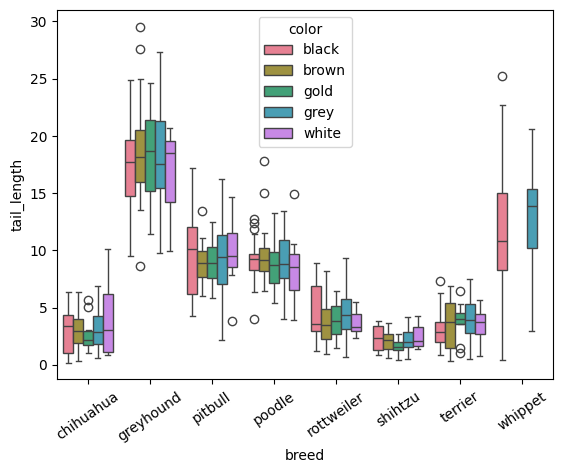

<Figure size 640x480 with 0 Axes>

In [98]:
# plot tail length by breed
sns.boxplot(data=dogs, x='breed', y='tail_length', hue='color', palette='husl')
plt.xticks(rotation=35)
plt.show()
plt.clf()

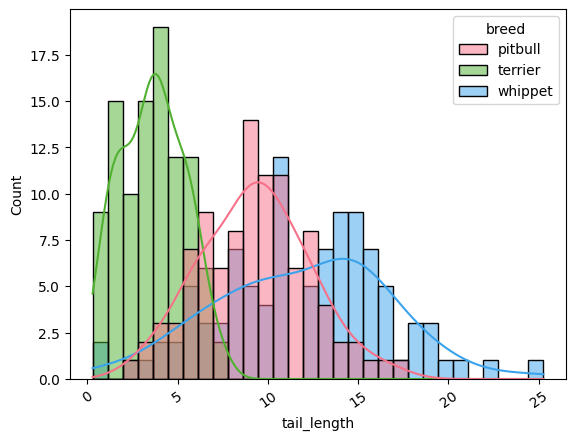

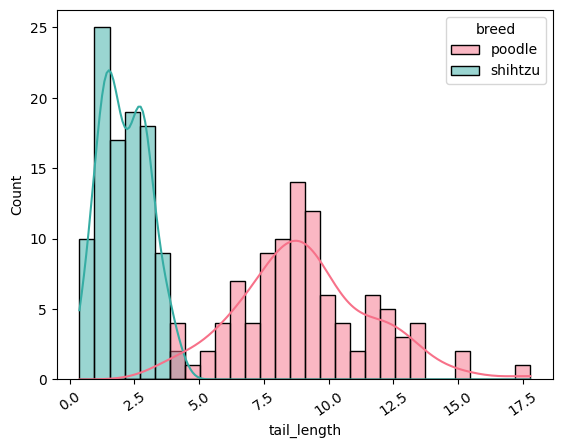

<Figure size 640x480 with 0 Axes>

In [103]:
# plot tail length by breed
sns.histplot(data=dogs_wtp, x='tail_length', hue='breed', palette='husl', kde=True, bins=30)
plt.xticks(rotation=35)
plt.show()
plt.clf()
sns.histplot(data=dogs_ps, x='tail_length', hue='breed', palette='husl', kde=True, bins=30)
plt.xticks(rotation=35)
plt.show()
plt.clf()